# Visualize Hmm Results
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.
Get an visualized overview of the hidden markov modeling results.

## Load merged .h5 files

A merged .h5 file is the result of the MergeHdf5 Jupyter Notebook. It comprises the hmm results as well as the type analysis results. All .5 files of the chosen directory will be loaded.

In [1]:
from pySPT.widgets.widgetNotebooks import load_merged_h5
from pySPT.widgets.widgetNotebooks import init_save_hmm_vis_stats
from pySPT.widgets import widgetHmmVis
from pySPT.hmm import hmmVisualization
import warnings
warnings.filterwarnings('ignore')
widget_hmm_vis = widgetHmmVis.WidgetHmmVis()
hmm_vis = hmmVisualization.HmmVisualization()
display(widget_hmm_vis.load_dir_box, widget_hmm_vis.load_dir_button)
widget_hmm_vis.load_dir_button.on_click(widget_hmm_vis.open_dir)
widget_hmm_vis.load_dir_box.observe(widget_hmm_vis.change_load_dir_box)

Text(value='directory', description='Directory', placeholder='Type something', style=DescriptionStyle(descript…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

## Plot results

Button(description='plot', style=ButtonStyle(), tooltip='click to plot')

Mean AIC value: 160179.403
[array([[0.90757543, 0.03381496, 0.0586096 ],
       [0.01852311, 0.96973234, 0.01174455],
       [0.04143818, 0.01315432, 0.9454075 ]]), array([[0.93349227, 0.01257019, 0.05393753],
       [0.00941286, 0.9818686 , 0.00871854],
       [0.05011437, 0.01053121, 0.93935441]])]
Mean population of states: 0.06695 0.53194 0.40112  
Mean transition probabilities:
0.92053 0.02319 0.05627
0.01397 0.97580 0.01023
0.04578 0.01184 0.94238
Mean diffusion coefficients [µm²/s] 0.00000 0.12355 0.00000  


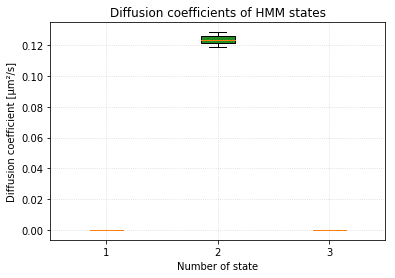

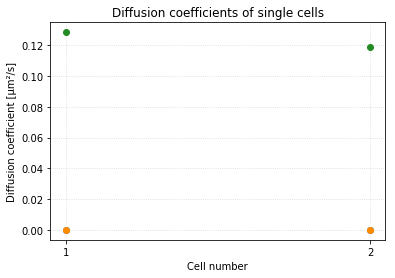

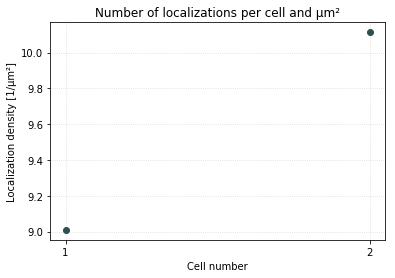

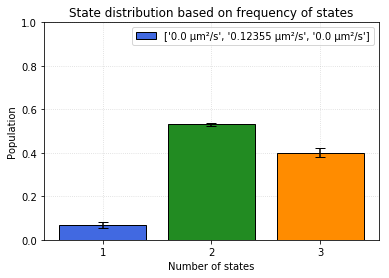

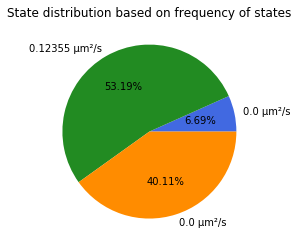

In [2]:
def event(blub):
    widget_hmm_vis.search_sub_folders(widget_hmm_vis.load_dir_box.value)
    hmm_vis.cells = load_merged_h5(widget_hmm_vis.file_names)
    hmm_vis.run()
display(widget_hmm_vis.plot_button)
widget_hmm_vis.plot_button.on_click(event)

## Save results

Choose a directory and a folder name. A .h5 file with the statistics and the informations of all plots will be saved. If the "save plots" box is checked, all plots will be saved as .png.

In [3]:
def saving(event):
    if not widget_hmm_vis.save_dir_name:
        print("Please insert a directory")
    else:
        widget_hmm_vis.create_clear_output()
        hmm_vis.save_dir, hmm_vis.save_folder_name, hmm_vis.save_plots = widget_hmm_vis.save_dir_name, widget_hmm_vis.save_folder_name_box.value, widget_hmm_vis.save_plots_checkbox.value
        if hmm_vis.save_plots:
            hmm_vis.run_save_plots()
        init_save_hmm_vis_stats(hmm_vis, hmm_vis.save_dir, hmm_vis.save_folder_name)
display(widget_hmm_vis.save_dir_box, widget_hmm_vis.save_dir_button, widget_hmm_vis.save_folder_name_box, widget_hmm_vis.save_plots_checkbox, widget_hmm_vis.save_button)
widget_hmm_vis.save_dir_button.on_click(widget_hmm_vis.save_open_dir)
widget_hmm_vis.save_button.on_click(saving)